<a href="https://colab.research.google.com/github/Espipi/Useless_Scripts/blob/main/Get_ERA5_dataset_from_iokolab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
city = {"Douala": [4.05, 9.7], "Accra":[5.55, -0.2], "Lagos":[6.52, 3.38]}

#ERA5 data from oikolab: https://docs.oikolab.com/#1-introduction
#Parameters (Temperature, Wind, Radiation, Pressure, Humidity & Precipitation) 
#available on: https://docs.oikolab.com/#2-3-available-parameters
#Temporal Resolution: 1hr

url = 'https://api.oikolab.com/weather'
params = {'param': ['temperature','wind_speed', 'relative_humidity', 
                    'surface_solar_radiation', 'dewpoint_temperature',
                    'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
                    'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
                                   'total_precipitation'],
                         'start': '2008-01-01',
                         'end': '2020-12-31',
                         'lat': [4.05, 5.55, 6.52], 
                         'lon': [9.7, -0.2, 3.38],
                         'api-key': '327edce3614c41459095084f859da57d' }
r = requests.get(url, params=params)

weather_data = json.loads(r.json()['data'])
df = pd.DataFrame(index=pd.to_datetime(weather_data['index'], 
                                       unit='s'),
                  data=weather_data['data'],
                  columns=weather_data['columns'])

In [2]:
display(df.head())
display(df.tail())

,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s),relative_humidity (0-1),surface_solar_radiation (W/m^2),dewpoint_temperature (degC),volumetric_soil_water_layer_1 (0-1),volumetric_soil_water_layer_2 (0-1),volumetric_soil_water_layer_3 (0-1),volumetric_soil_water_layer_4 (0-1),total_precipitation (mm of water equivalent)
2008-01-01 00:00:00,"(4.05, 9.7)",era5,35.73,1.0,25.26,0.92,0.94,0.0,24.27,0.33,0.32,0.31,0.39,0.11
2008-01-01 01:00:00,"(4.05, 9.7)",era5,35.73,1.0,25.03,0.67,0.95,0.0,24.16,0.33,0.32,0.31,0.39,0.07
2008-01-01 02:00:00,"(4.05, 9.7)",era5,35.73,1.0,24.62,0.13,0.95,0.0,23.76,0.33,0.32,0.31,0.39,0.39
2008-01-01 03:00:00,"(4.05, 9.7)",era5,35.73,1.0,24.59,0.52,0.96,0.0,23.87,0.33,0.32,0.31,0.39,0.05
2008-01-01 04:00:00,"(4.05, 9.7)",era5,35.73,1.0,24.61,0.60,0.96,0.0,23.89,0.33,0.32,0.31,0.39,0.20


,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s),relative_humidity (0-1),surface_solar_radiation (W/m^2),dewpoint_temperature (degC),volumetric_soil_water_layer_1 (0-1),volumetric_soil_water_layer_2 (0-1),volumetric_soil_water_layer_3 (0-1),volumetric_soil_water_layer_4 (0-1),total_precipitation (mm of water equivalent)
2020-12-30 20:00:00,"(6.52, 3.38)",era5,16.15,0.0,27.23,3.82,0.85,0.0,24.56,0.09,0.12,0.14,0.17,0.0
2020-12-30 21:00:00,"(6.52, 3.38)",era5,16.15,0.0,27.38,3.75,0.85,0.0,24.65,0.09,0.12,0.13,0.17,0.0
2020-12-30 22:00:00,"(6.52, 3.38)",era5,16.15,0.0,26.84,3.21,0.91,0.0,25.23,0.09,0.12,0.14,0.17,0.0
2020-12-30 23:00:00,"(6.52, 3.38)",era5,16.15,0.0,26.83,3.30,0.91,0.0,25.22,0.09,0.12,0.14,0.17,0.0
2020-12-31 00:00:00,"(6.52, 3.38)",era5,16.15,0.0,26.64,3.23,0.90,0.0,24.92,0.09,0.12,0.14,0.17,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341859 entries, 2008-01-01 00:00:00 to 2020-12-31 00:00:00
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   coordinates (lat,lon)                         341859 non-null  object 
 1   model (name)                                  341859 non-null  object 
 2   model elevation (surface)                     341859 non-null  float64
 3   utc_offset (hrs)                              341859 non-null  float64
 4   temperature (degC)                            341859 non-null  float64
 5   wind_speed (m/s)                              341859 non-null  float64
 6   relative_humidity (0-1)                       341859 non-null  float64
 7   surface_solar_radiation (W/m^2)               341859 non-null  float64
 8   dewpoint_temperature (degC)                   341859 non-null  float64
 9   volumetric_soi

In [4]:
df.isna().sum()

coordinates (lat,lon)                           0
model (name)                                    0
model elevation (surface)                       0
utc_offset (hrs)                                0
temperature (degC)                              0
wind_speed (m/s)                                0
relative_humidity (0-1)                         0
surface_solar_radiation (W/m^2)                 0
dewpoint_temperature (degC)                     0
volumetric_soil_water_layer_1 (0-1)             0
volumetric_soil_water_layer_2 (0-1)             0
volumetric_soil_water_layer_3 (0-1)             0
volumetric_soil_water_layer_4 (0-1)             0
total_precipitation (mm of water equivalent)    0
dtype: int64

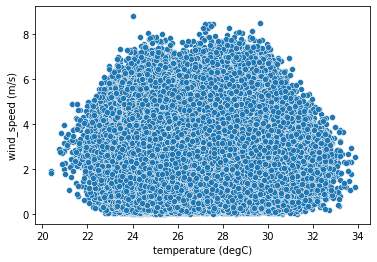

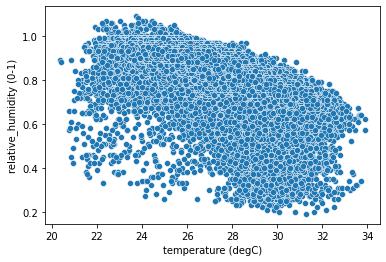

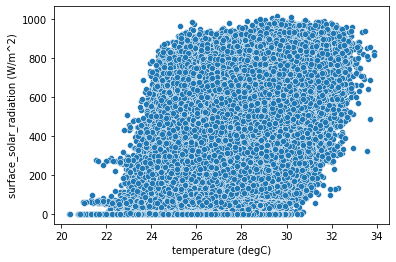

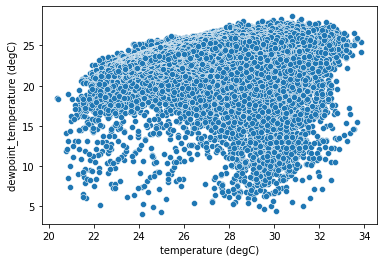

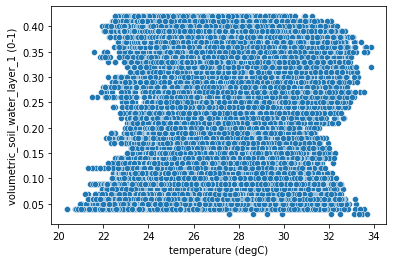

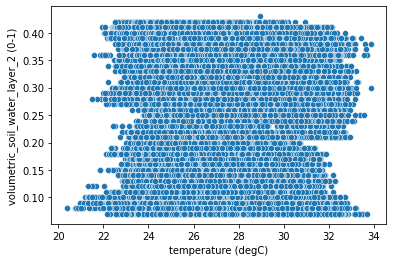

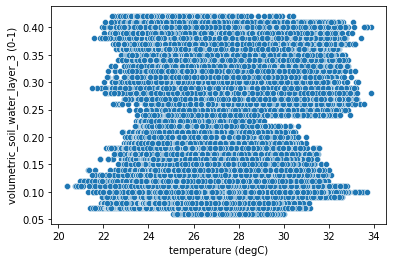

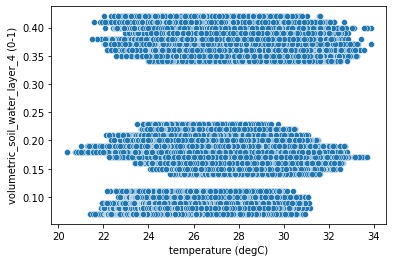

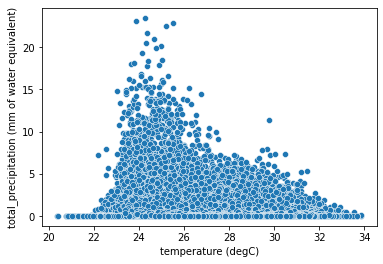

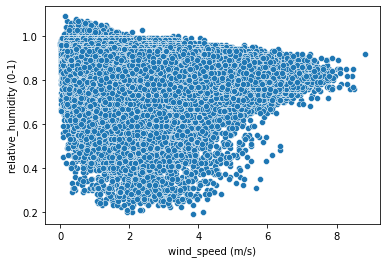

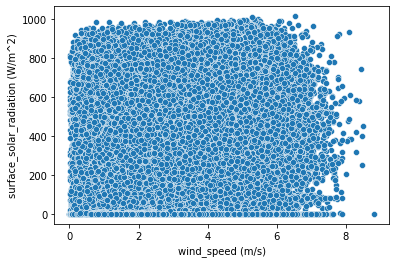

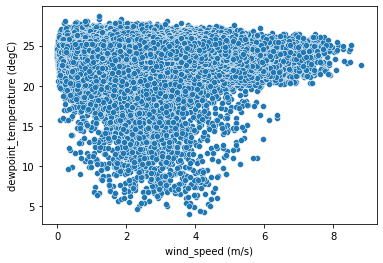

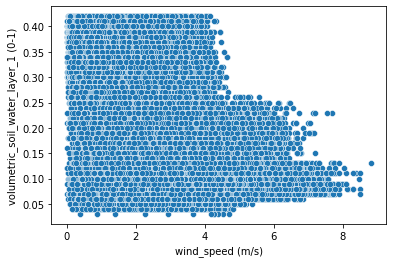

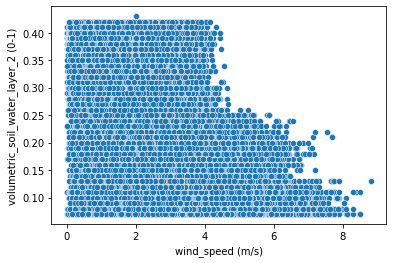

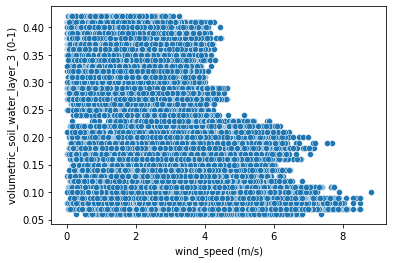

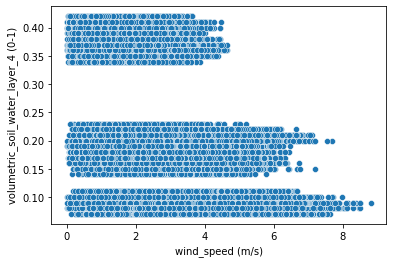

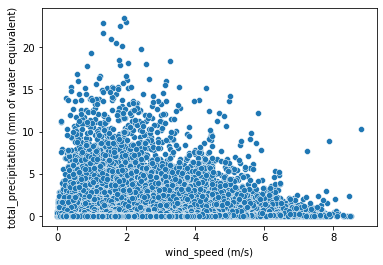

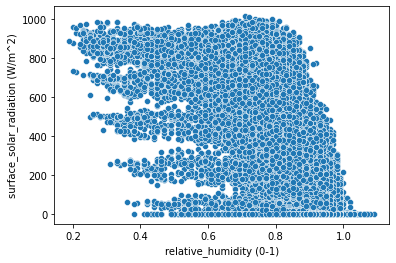

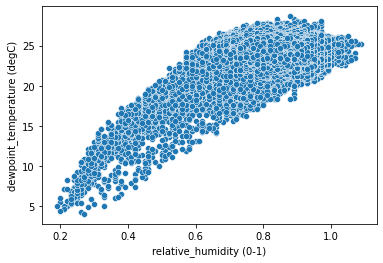

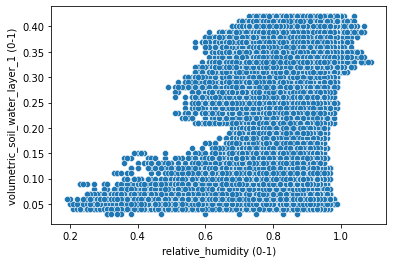

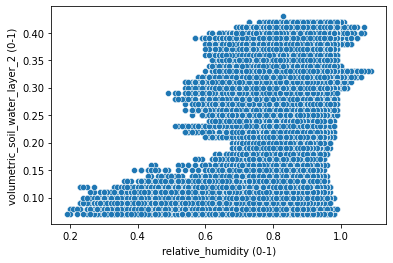

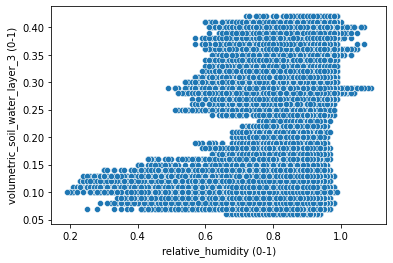

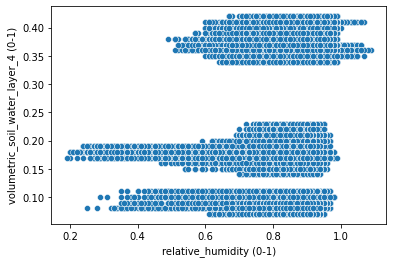

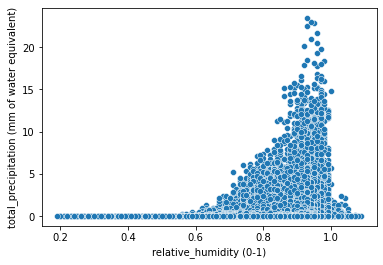

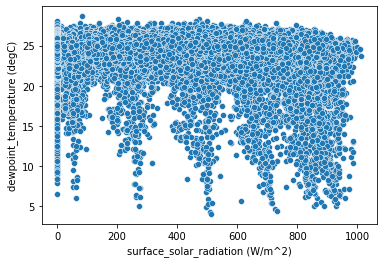

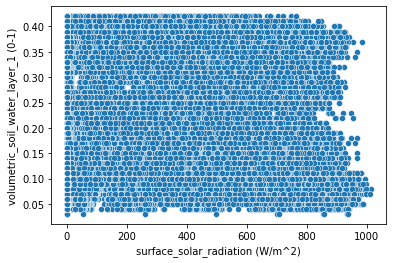

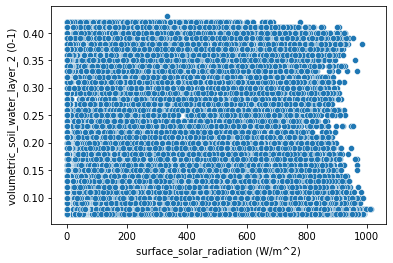

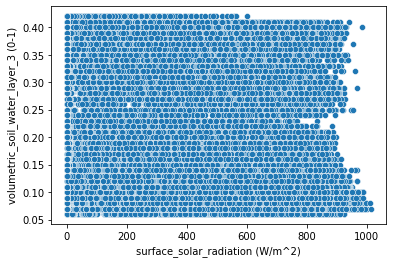

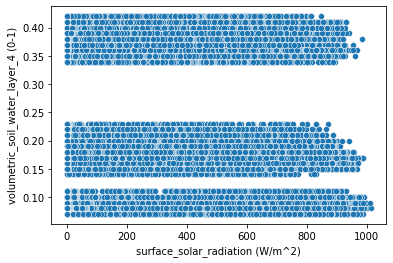

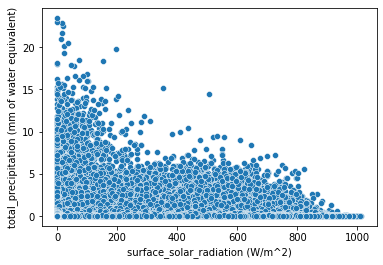

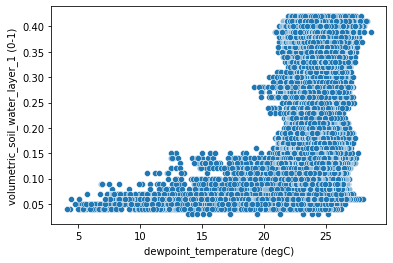

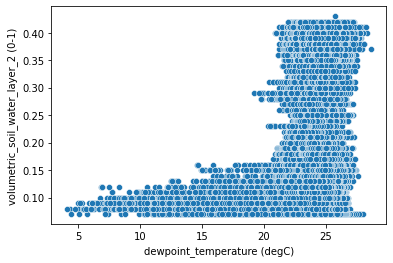

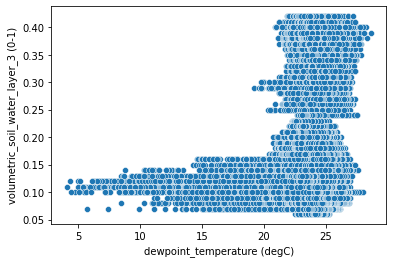

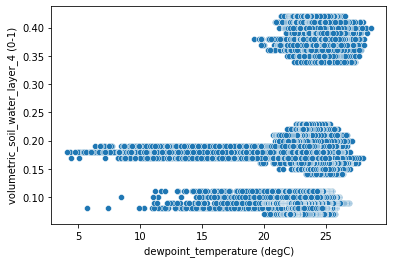

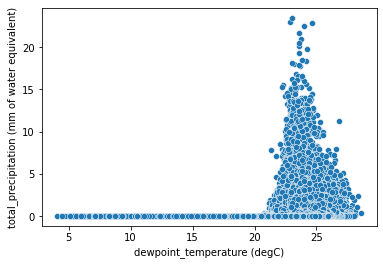

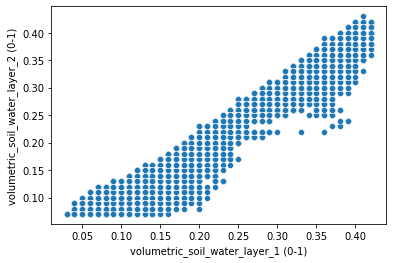

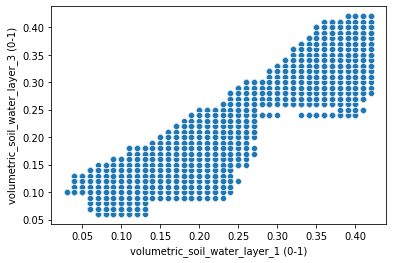

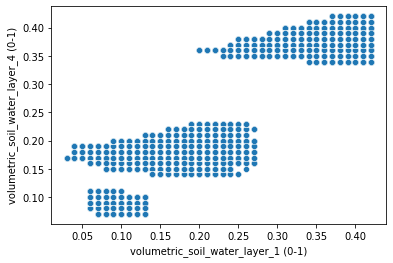

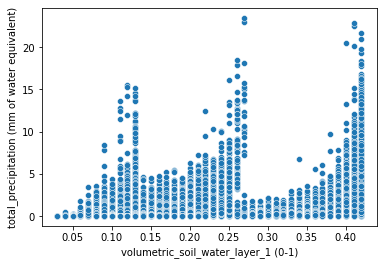

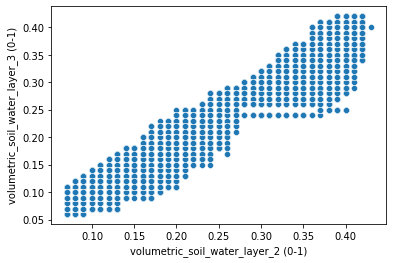

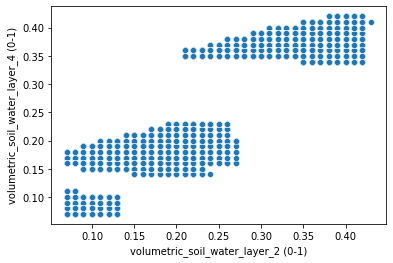

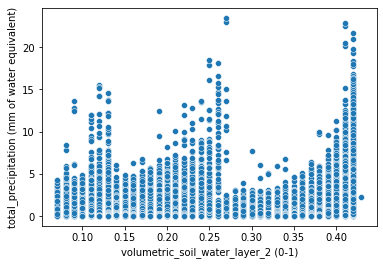

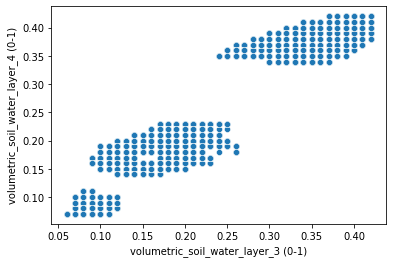

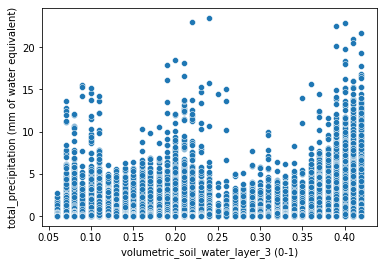

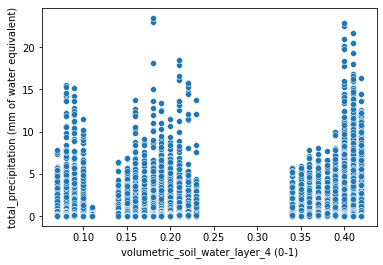

In [5]:
import seaborn as sns
df_dropped = df.drop(columns=["model elevation (surface)", "utc_offset (hrs)"])
numeric_features=[x for x in df_dropped.columns if df[x].dtype!="object"]
#taking only the numeric columns from the dataframe.

for i in range(len(numeric_features)-1):
  for j in range(i+1, len(numeric_features)):
    sns.scatterplot(data = df_dropped, x = numeric_features[i], y = numeric_features[j])
    plt.show()

In [ ]:
#Save to csv file
df.to_csv('ERA5_dataset_from_iokolab.csv')